## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mtcars.csv')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 1. 데이터 type(object, int, float...)

In [3]:
# 데이터 타입 확인
df.dtypes

car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [4]:
# 데이터 타입 변경 1개
df1 = df.copy()
df1 = df1.astype({'cyl':'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl      object
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object


In [5]:
# 데이터 타입 변경 2개
df1 = df1.astype({'cyl' : 'int', 'gear' : 'object'})
print(df1.dtypes)

car      object
mpg     float64
cyl       int32
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear     object
carb      int64
dtype: object


In [6]:
df['cyl']

0     6
1     6
2     4
3     6
4     8
5     6
6     8
7     4
8     4
9     6
10    6
11    8
12    8
13    8
14    8
15    8
16    8
17    4
18    4
19    4
20    4
21    8
22    8
23    8
24    8
25    4
26    4
27    4
28    8
29    6
30    8
31    4
Name: cyl, dtype: int64

In [7]:
df1['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

## 2. 기초 통계량(평균, 중앙값, IQR, 표준편차..)

### 1) 중심 측도를 나타내는 값(평균, 중앙값, 최빈값)

In [8]:
df = pd.read_csv('mtcars.csv')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
df.shape # 행, 열

(32, 12)

In [10]:
# 평균값 구하기
mpg_mean = df['mpg'].mean()

In [11]:
print(mpg_mean)

20.090625000000003


In [12]:
# 중앙값 구하기

In [13]:
mpg_median = df['mpg'].median()

In [14]:
print(mpg_median)

19.2


In [15]:
# 최빈값 구하기
mpg_mode = df['cyl'].mode()

In [16]:
print(mpg_mode)

0    8
Name: cyl, dtype: int64


In [17]:
print(mpg_mode[0])

8


In [18]:
df['cyl'].value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

### 2) 산포도를 나타내는 값(분산, 표준편차. IQR, 범위(min-max)..)

In [19]:
# 분산
mpg_var = df['mpg'].var()

In [20]:
print(mpg_var)

36.32410282258065


In [21]:
# 표준편차
mpg_std = df['mpg'].std()

In [22]:
print(mpg_std)

6.026948052089105


In [23]:
# IQR
Q1 = df['mpg'].quantile(.25)
print(Q1)

15.425


In [24]:
Q3 = df['mpg'].quantile(.75)
print(Q3)

22.8


In [25]:
IQR = Q3 - Q1
print(IQR)

7.375


In [26]:
Q2 = df['mpg'].quantile(.50)
print(Q2)
print(mpg_median)

19.2
19.2


In [27]:
mpg_max = df['mpg'].max()
print(mpg_max)

33.9


In [28]:
mpg_min = df['mpg'].min()
print(mpg_min)

10.4


In [29]:
mpg_range = mpg_max - mpg_min
print(mpg_range)

23.5


### 3) 분포의 비대칭도

In [30]:
# 왜도
mpg_skew = df['mpg'].skew()
print(mpg_skew)

0.6723771376290805


In [31]:
# 첨도
mpg_kurt = df['mpg'].kurt()
print(mpg_kurt)

-0.0220062914240855


### 4) 기타(합계, 절대값, 데이터 수..)

In [32]:
mpg_sum = df['mpg'].sum()
print(mpg_sum)

642.9000000000001


In [33]:
# 절댓값
IQR2 = Q1 - Q3
print(IQR2)
print(abs(IQR2))

-7.375
7.375


In [34]:
# 데이터 수
len(df['mpg'])

32

### 5) 그룹화하여 계산하기 (groupby 활용)

In [35]:
# species 별로 각 변수의 평균 구해보기
import seaborn as sns
df = sns.load_dataset('iris')
print(df.head())
df.groupby('species').mean()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [36]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


# 3. 데이터 인덱싱, 필터링, 정렬, 변경 등

In [37]:
df = pd.read_csv('mtcars.csv')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 1) 데이터 인덱싱

In [38]:
# 행/열 인덱싱 : df.loc['행','열']
df.loc[3, 'mpg'] # 3번째가 아닌 3번 인덱스

21.4

In [39]:
# 열만 인덱싱
df.loc[:, 'mpg'].head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [40]:
df.loc[0:3, ['mpg', 'cyl', 'disp']]

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [41]:
df.loc[0:3, 'mpg':'disp']

,mpg,cyl,disp
0,21.0,6,160.0
1,21.0,6,160.0
2,22.8,4,108.0
3,21.4,6,258.0


In [42]:
# 앞에서 n행 인덱싱
df.head(2)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [43]:
# 뒤에서 n행 인덱싱
df.tail(2)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.78,18.6,1,1,4,2


## 2) 열(Columns) 추가/제거

In [44]:
# 열 선택
df_cyl = df['cyl']
df_cyl.head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [45]:
df.cyl.head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [46]:
df['cyl'].head(3)

0    6
1    6
2    4
Name: cyl, dtype: int64

In [47]:
df_new = df[['cyl', 'mpg']]
df_new.head(3)

,cyl,mpg
0,6,21.0
1,6,21.0
2,4,22.8


In [48]:
# 열 제거
df.drop(columns = ['car', 'mpg', 'cyl']).head(3)

,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,160.0,110,3.90,2.620,16.46,0,1,4,4
1,160.0,110,3.90,2.875,17.02,0,1,4,4
2,108.0,93,3.85,2.320,18.61,1,1,4,1


In [49]:
# 열 추가
df2 = df.copy()
df2['new'] = df['mpg'] + 10
df2.head(3)

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,new
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,31.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,31.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,32.8


## 3) 데이터 필터링

In [50]:
# 1개 조건 필터링
# cyl = 4 인 데이터의 수
cond1 = (df['cyl']==4)
len(df[cond1])

# cyl_4 = df[ df['cyl'] ]
# print(len(cyl_4))

11

In [51]:
len(df[ df['cyl'] == 4 ])

11

In [52]:
# mpg 가 22 이상인 데이터 수
cond2 = (df['mpg'] >= 22)
len(df[cond2])

9

In [53]:
len(df[ df['mpg'] >= 22 ])

9

In [54]:
# 2개 조건 필터링 (and)
df[cond1 & cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [55]:
# 2개 조건 필터링 후 데이터 갯수 (and)
print(len(df[cond1 & cond2]))

9


In [56]:
# 2개 조건 필터링 (or)
df[cond1 | cond2]

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [57]:
# 2개 조건 필터링 후 데이터 갯수 (or)
len(df[cond1 | cond2])

11

In [58]:
# 한번에 코딩할 경우
# cyl가 4면서 mpg 값이 22 이상인 경우, 둘 중 하나만 만족하는 경우의 데이터 수를 각각 표현
print(len(df[(df['cyl'] == 4) & (df['mpg'] >= 22)]))
print(len(df[(df['cyl'] == 4) | (df['mpg'] >= 22)]))

9
11


## 4) 데이터 정렬

In [59]:
# 내림차순 정렬 (위에서 내려감)
df.sort_values('mpg', ascending = False).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1


In [60]:
# 오름차순 정렬 (밑에서 올라감)
df.sort_values('mpg', ascending = True).head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


## 5) 데이터 변경(조건문)

In [61]:
import numpy as np
df = pd.read_csv('mtcars.csv')
# np.where 활용
# hp 변수 값 중에서 205가 넘는 값은 205로 처리하고 나머지는 그대로 유지
df['hp'] = np.where(df['hp'] >= 205, 205, df['hp'])

# 내림차순 정렬 (위에서 내려감)
df.sort_values('hp', ascending = False).head(10)

# 활용 : 이상치를 Max 값이나 Min 값으로 대체할 경우 조건문 활용

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
16,Chrysler Imperial,14.7,8,440.0,205,3.23,5.345,17.42,0,0,3,4
30,Maserati Bora,15.0,8,301.0,205,3.54,3.570,14.60,0,1,5,8
28,Ford Pantera L,15.8,8,351.0,205,4.22,3.170,14.50,0,1,5,4
6,Duster 360,14.3,8,360.0,205,3.21,3.570,15.84,0,0,3,4
23,Camaro Z28,13.3,8,350.0,205,3.73,3.840,15.41,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,205,3.00,5.424,17.82,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


# 4. 결측치, 이상치, 중복값 처리(제거/대체)

## 데이터 불러오기 (타이타닉 데이터 셋)

> 종속변수(y) : 생존여부(0 사망, 1 생존)
>
>독립변수(x) : pclass, sex, age 등의 탑승자 정보(변수)

In [62]:
import seaborn as sns
# 데이터 셋 목록 : sns.get_dataset_names()
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

In [63]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
df.shape

(891, 15)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [66]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
print(df.dropna(axis = 0).shape) # 행 기준
print(df.dropna(axis = 1).shape) # 열 기준

(182, 15)
(891, 11)


In [68]:
# 결측치 제거
# 데이터 복사
df2 = df.copy()
df2 = pd.DataFrame(df)

In [69]:
# 1. 중앙값/평균값 등으로 대체

# 먼저 중앙값을 구함
median_age = df2['age'].median()
print(median_age)

# 평균으로 대체할 경우
# mean_age = df2['age'].mean()

28.0


In [70]:
# 구한 중앙값으로 결측치를 대체
df2['age'] = df['age'].fillna(median_age)

In [71]:
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [72]:
# 로우 데이터
print(df['age'].mean())
# 결측치 대체한 가공 데이터
print(df2['age'].mean())

29.69911764705882
29.36158249158249


## 2) 이상치 확인 및 처리

### 상자그림 활용 (이상치 : Q1, Q3로 부터 1.5 * IQR을 초과하는 값)

<Axes: >

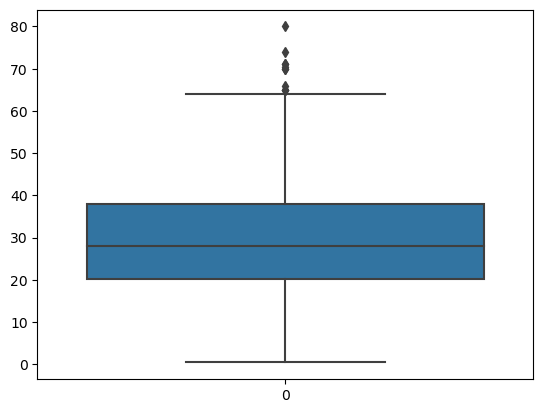

In [73]:
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')

# 참고) 상자그림
sns.boxplot(df['age'])

In [74]:
# Q1, Q3, IQR 구하기
Q1 = df['age'].quantile(.25)
Q3 = df['age'].quantile(.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

20.125 38.0 17.875


In [75]:
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print(upper, lower)

64.8125 -6.6875


In [76]:
# 문제 : age 변수의 이상치를 제외한 데이터 수는? 상자그림 기준)
cond1 = (df['age'] <= upper) # 부호주의
cond2 = (df['age'] >= lower) # 부호주의
print(len(df[cond1 & cond2]))
print(len(df[cond1]))
print(len(df))

703
703
891


In [77]:
# 문제 : age 변수의 이상치를 제외한 데이터셋 확인 상자그림 기준)
df_new = df[cond1 & cond2]
df_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 표준 정규분포 활용 (이상치 : +-3Z 값을 넘어가는 값)

In [78]:
# 데이터 표준화, Z = (개별값 - 평균) / 표준편차

In [79]:
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334044


In [80]:
znorm = (df['age'] - mean_age) / std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [81]:
# 문제 : 이상치의 갯수는 몇개인가? +-3Z 기준)

In [85]:
cond1 = (znorm > 3)
len(df[cond1])

2

In [87]:
cond2 = (znorm < -3)
len(df[cond2])

0

In [88]:
print(len(df[cond1]) + len(df[cond2]))

2


## 3) 중복값 제거

In [89]:
# 데이터 불러오기
df = sns.load_dataset('titanic')

In [90]:
df.shape

(891, 15)

In [91]:
df1 = df.copy()
df1 = df1.drop_duplicates()
print(df1.shape)

# 주의) 예제에서는 중복값이 있어서 제거했지만, 중복값이 나올 수 있는 상황이면 제거할 필요 없음.

(784, 15)


# 5. 데이터 scaling(데이터 표준화, 정규화)

In [92]:
df= pd.read_csv('mtcars.csv')
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [94]:
from sklearn.preprocessing import StandardScaler
zscaler = StandardScaler() # 변수명은 사용하기 편한 변수명으로 사용
df['mpg'] = zscaler.fit_transform(df[['mpg']])
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.153299,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.153299,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.456737,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.220730,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,-0.234427,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [95]:
# 확인
print(df['mpg'].mean(), df['mpg'].std())

-4.996003610813204e-16 1.016001016001524


## 2) 데이터 정규화(min-max normalication)

In [96]:
df = pd.read_csv('mtcars.csv')
df.head()

from sklearn.preprocessing import MinMaxScaler
mscaler = MinMaxScaler()
df['mpg'] = mscaler.fit_transform(df[['mpg']])
df.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,0.451064,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,0.451064,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,0.527660,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,0.468085,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,0.353191,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [98]:
# 확인
print(df['mpg'].min(), df['mpg'].max())

0.0 1.0


# 6. 데이터 합치기

In [99]:
# 행, 열 방향으로 데이터 합치기
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:
# 데이터 2개로 분리
df1 = df.loc[0:30, ] # 0~30 행 데이터
df2 = df.loc[31:60, ] # 31~60 행 데이터

In [101]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [102]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
35,5.0,3.2,1.2,0.2,setosa


In [103]:
df_sum = pd.concat([df1, df2], axis = 0) # 행방향으로 결함 (위, 아래)
print(df_sum.head())
print(df_sum.shape)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(61, 5)


In [104]:
# 데이터 2개 나누기
df1 = df.loc[: , 'sepal_length':'petal_length'] # 1~3열 추출 데이터
df2 = df.loc[: , ['petal_width', 'species']] # 4~5열 추출 데이터

In [105]:
df_sum = pd.concat([df1, df2], axis = 1) # 열 방향으로 결합 (좌. 우)
df_sum.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 7. 날짜/시간 데이터, index 다루기

## 1) 날짜 다루기

In [111]:
# 데이터 만들기
df = pd.DataFrame({
    '날짜' : ['20230105', '20230105', '20230223', '20230223', '20230312', '20230422', '20230511'],
    '물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
    '판매수' : [5, 10, 15, 15, 20 , 25, 40],
    '개당수익' : [500, 600, 500, 600, 600, 700, 600]
})

df

,날짜,물품,판매수,개당수익
0,20230105,A,5,500
1,20230105,B,10,600
2,20230223,A,15,500
3,20230223,B,15,600
4,20230312,A,20,600
5,20230422,B,25,700
6,20230511,A,40,600


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   물품      7 non-null      object
 2   판매수     7 non-null      int64 
 3   개당수익    7 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


In [113]:
# 데이터 타입 datetime 으로 변경
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      7 non-null      datetime64[ns]
 1   물품      7 non-null      object        
 2   판매수     7 non-null      int64         
 3   개당수익    7 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 352.0+ bytes


In [114]:
# 년, 월, 일 변수 추가하기
df['year'] = df['날짜'].dt.year
df['month'] = df['날짜'].dt.month
df['day'] = df['날짜'].dt.day
df

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5
2,2023-02-23,A,15,500,2023,2,23
3,2023-02-23,B,15,600,2023,2,23
4,2023-03-12,A,20,600,2023,3,12
5,2023-04-22,B,25,700,2023,4,22
6,2023-05-11,A,40,600,2023,5,11


In [115]:
# 날짜 구간 필터링
df[df['날짜'].between('2023-01-01', '2023-01-31')] # 1월 31일은 미포함

,날짜,물품,판매수,개당수익,year,month,day
0,2023-01-05,A,5,500,2023,1,5
1,2023-01-05,B,10,600,2023,1,5


In [116]:
# 날짜를 인덱스로 설정후 loc 함수 사용
# 데이터 만들기
df = pd.DataFrame({
    '날짜' : ['20230105', '20230105', '20230223', '20230223', '20230312', '20230422', '20230511'],
    '물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
    '판매수' : [5, 10, 15, 15, 20 , 25, 40],
    '개당수익' : [500, 600, 500, 600, 600, 700, 600]
})

# 데이터 타입 datetime 으로 변경
df['날짜'] = pd.to_datetime(df['날짜'])

df = df.set_index('날짜') # drop = True(기본값) / False
df.head(3)

,물품,판매수,개당수익
날짜,,,
2023-01-05,A,5,500
2023-01-05,B,10,600
2023-02-23,A,15,500


In [117]:
print(df.loc['2023-01-05':'2023-02-23']) # 둘다 기간 포함
print(df.loc[ (df.index >= '2023-01-05') & (df.index <= '2023-02-23')])

           물품  판매수  개당수익
날짜                      
2023-01-05  A    5   500
2023-01-05  B   10   600
2023-02-23  A   15   500
2023-02-23  B   15   600
           물품  판매수  개당수익
날짜                      
2023-01-05  A    5   500
2023-01-05  B   10   600
2023-02-23  A   15   500
2023-02-23  B   15   600


## 2) 시간 다루기

In [118]:
# 시간 데이터 만들기
df = pd.DataFrame({
    '물품' : ['A', 'B', 'A', 'B', 'A', 'B', 'A'],
    '판매수' : [5, 10, 15, 15, 20 , 25, 40],
    '개당수익' : [500, 600, 500, 600, 600, 700, 600]
})
time = pd.date_range('2023-09-24 12:25:00', '2023-09-25 14:45:30', periods = 7)
df['time'] = time
df = df[ ['time', '물품', '판매수', '개당수익'] ]
df

,time,물품,판매수,개당수익
0,2023-09-24 12:25:00,A,5,500
1,2023-09-24 16:48:25,B,10,600
2,2023-09-24 21:11:50,A,15,500
3,2023-09-25 01:35:15,B,15,600
4,2023-09-25 05:58:40,A,20,600
5,2023-09-25 10:22:05,B,25,700
6,2023-09-25 14:45:30,A,40,600


In [119]:
# index 초기화 (인덱스를 컬럼으로)
# df = df.reset_index()
# df

In [120]:
# index 새로 지정
df = df.set_index('time')
df

,물품,판매수,개당수익
time,,,
2023-09-24 12:25:00,A,5,500
2023-09-24 16:48:25,B,10,600
2023-09-24 21:11:50,A,15,500
2023-09-25 01:35:15,B,15,600
2023-09-25 05:58:40,A,20,600
2023-09-25 10:22:05,B,25,700
2023-09-25 14:45:30,A,40,600


In [121]:
# 시간 데이터 다루기 (시간이 인덱스에 위치해야함)
df.between_time(start_time = '12:25', end_time = '21:00') # 시간 시작, 끝 모두 포함
# iclude_start = False, include_end = False 옵션으로 시작, 끝 시간 제외 가능

,물품,판매수,개당수익
time,,,
2023-09-24 12:25:00,A,5,500
2023-09-24 16:48:25,B,10,600
2023-09-25 14:45:30,A,40,600


In [123]:
# 날짜를 인덱스로 설정후 loc 함수 사용
print(df.loc['2023-09-24 12:25:00' : '2023-09-24 21:11:50']) # 둘다 포함
print(df.loc[ (df.index >= '2023-09-24 12:25:00') & (df.index <= '2023-09-24 21:11:50') ])

                    물품  판매수  개당수익
time                             
2023-09-24 12:25:00  A    5   500
2023-09-24 16:48:25  B   10   600
2023-09-24 21:11:50  A   15   500
                    물품  판매수  개당수익
time                             
2023-09-24 12:25:00  A    5   500
2023-09-24 16:48:25  B   10   600
2023-09-24 21:11:50  A   15   500
